# Approximate Bayesian Computation Project Notebook
This notebook contains code to inspect and visualize the results of the experiments described in the report.

## Synthetic Problem

### Experimental results for ABC Rejection

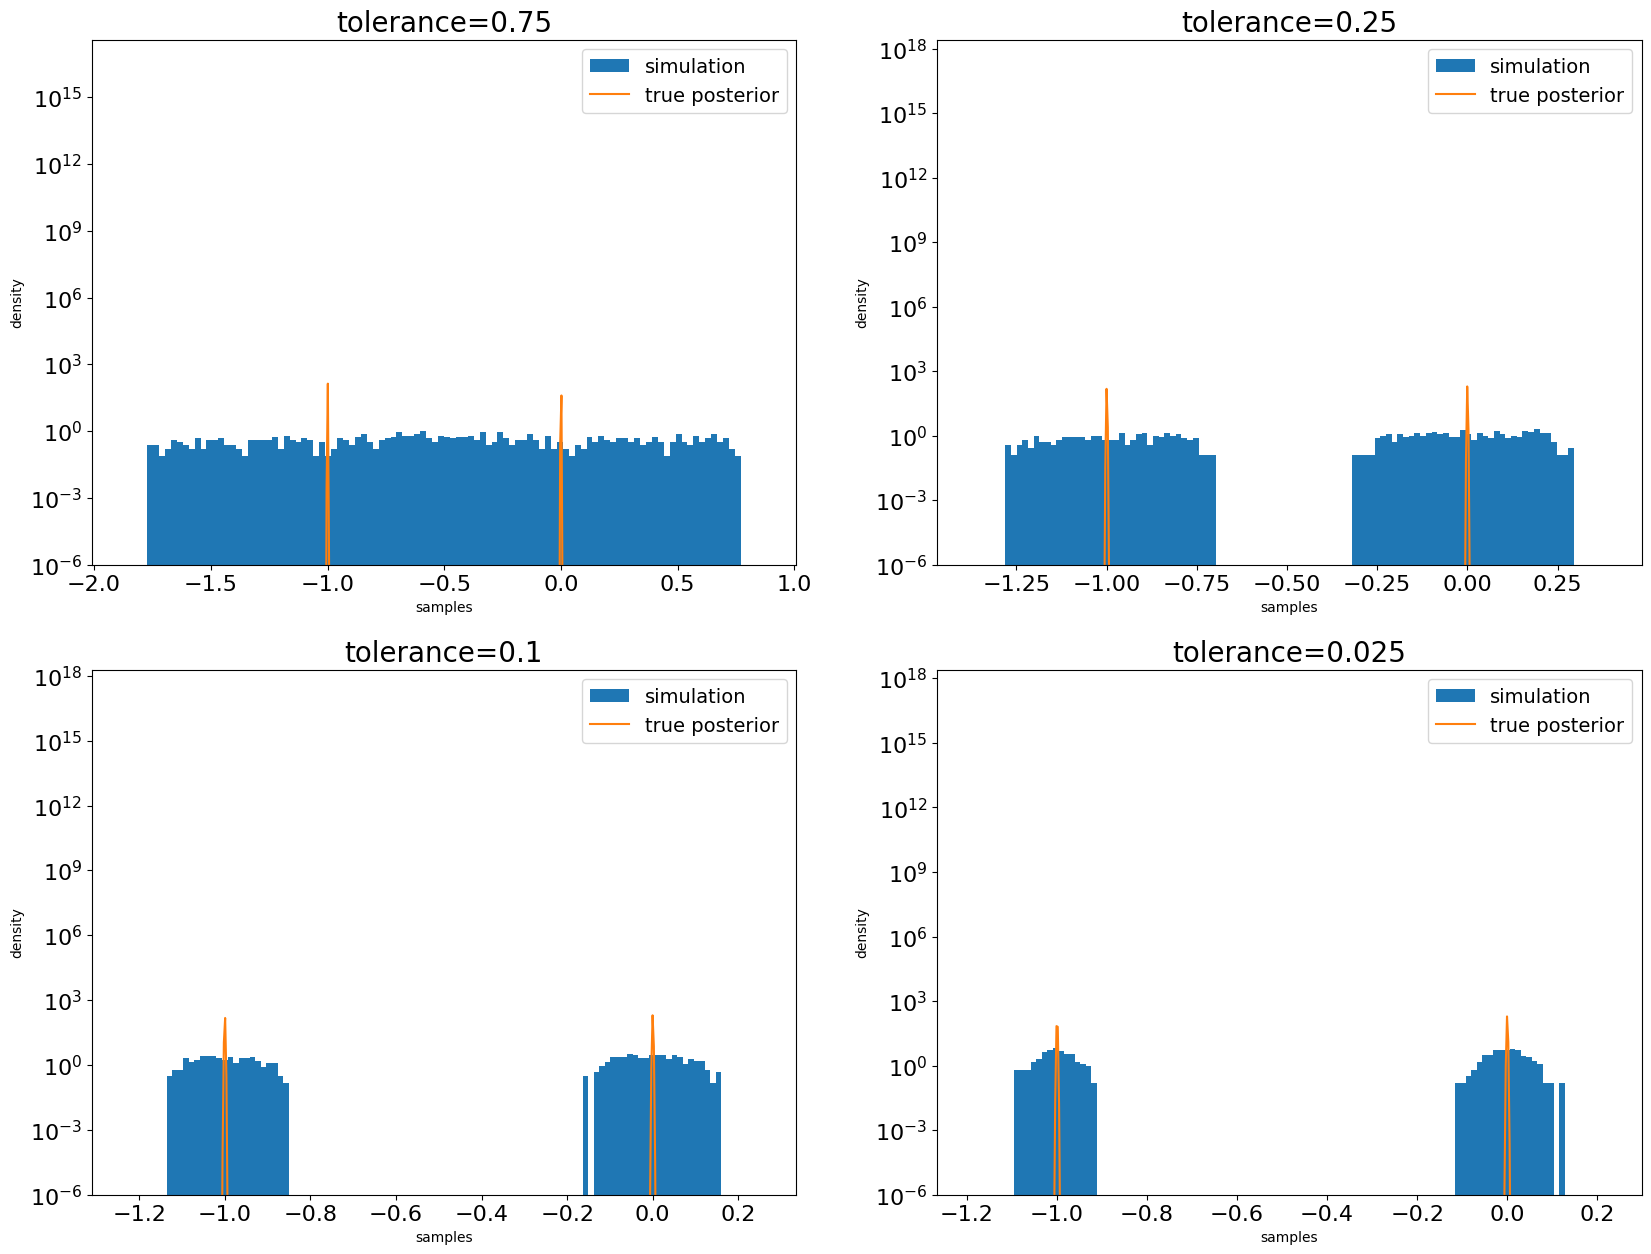

In [1]:
import numpy as np
from example import example_tolerances, ExamplePosteriorModel, example_M, example_mean, example_a, example_sigma, example_sigma_1, example_N, plot_ex_samples

posterior_model = ExamplePosteriorModel(example_M, example_mean, example_a, example_sigma, example_sigma_1)
tolerance_samples = []

for tolerance in example_tolerances:
    tolerance_samples.append(np.load(f"data/ex/q1/ex_q1_[tol={tolerance}]_[N={example_N}].npy"))

plot_ex_samples(tolerance_samples, posterior_model, example_tolerances, set_log=True, set_ylim=1e-6, save_path="data/ex/q1/figures/ex_q1.pdf")

### Experimental results for ABC MCMC

In [2]:
import numpy as np
from example import example_tolerances, ExamplePosteriorModel, example_M, example_mean, example_a, example_sigma, example_sigma_1, example_N, plot_ex_samples

posterior_model = ExamplePosteriorModel(example_M, example_mean, example_a, example_sigma, example_sigma_1)
proposal_vars = [0.5, 1, 2, 4, 8]

#### Results for var=0.5

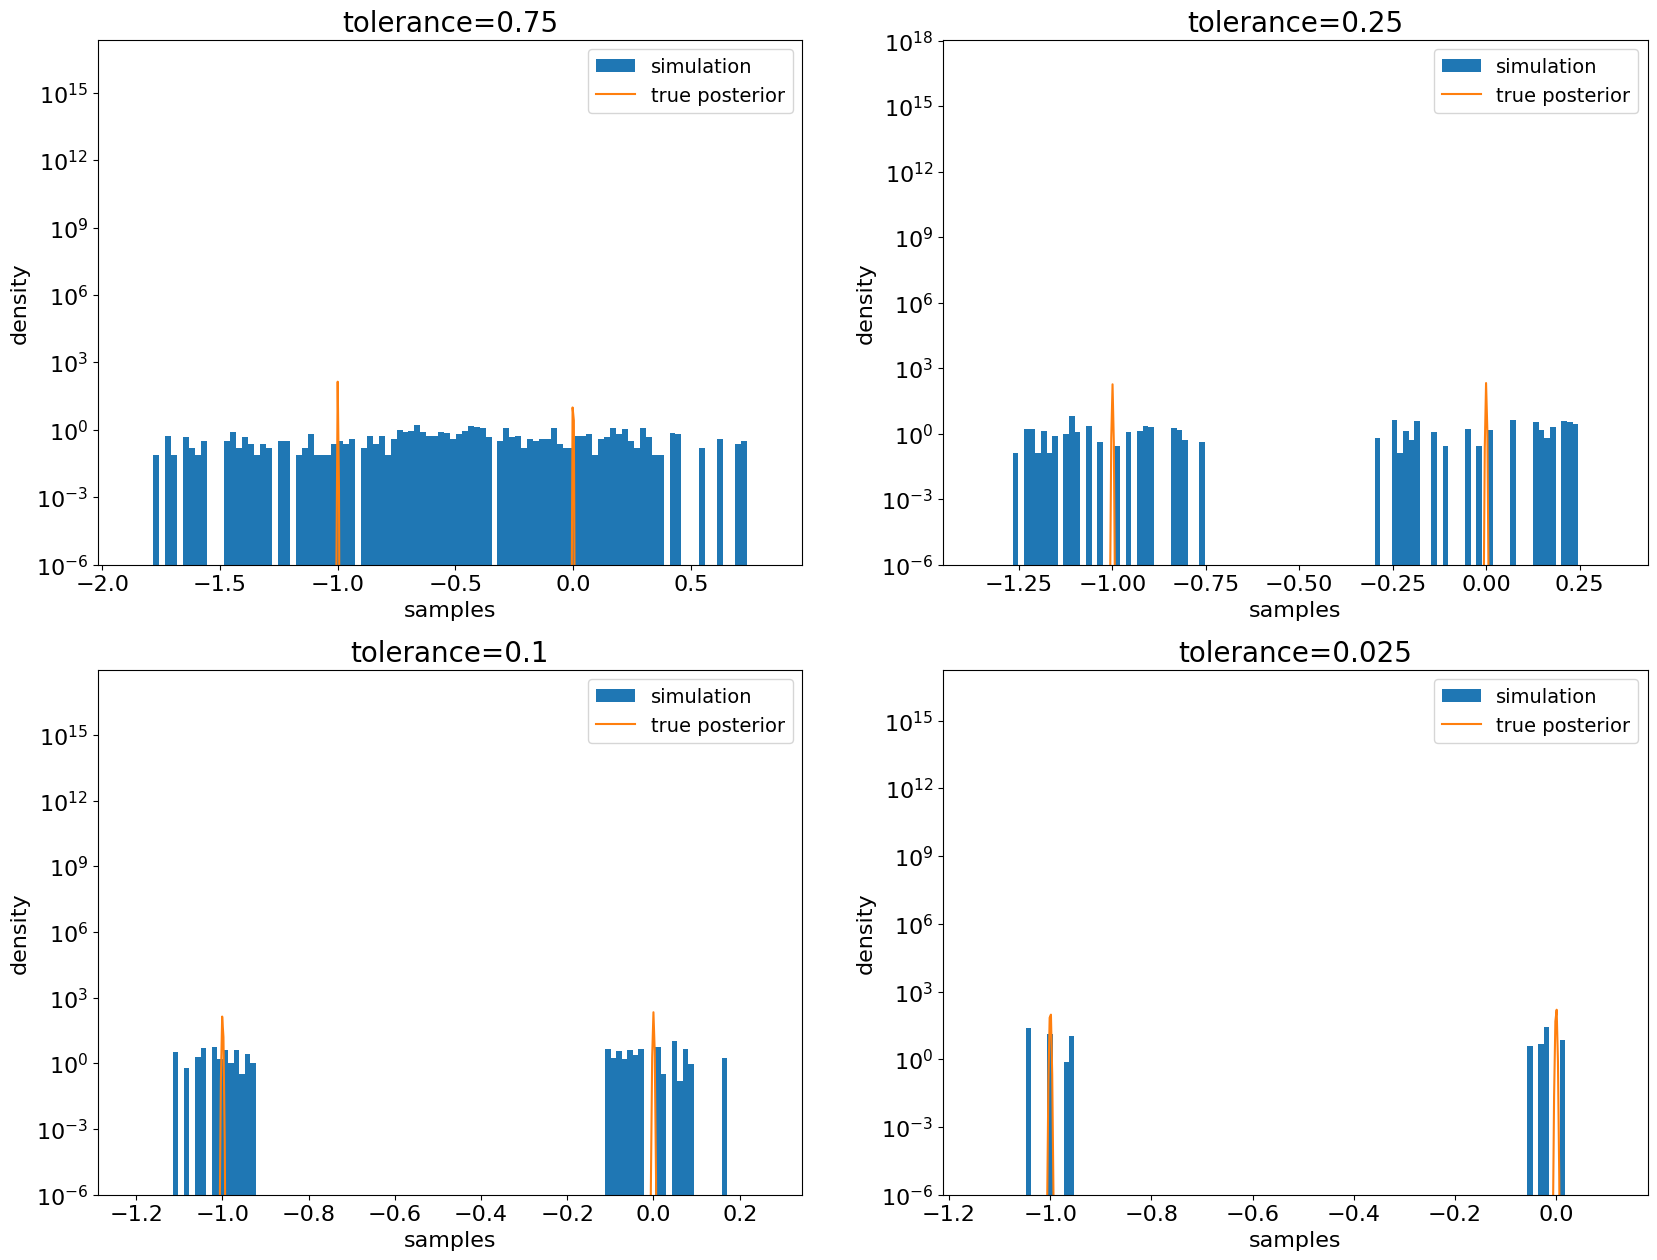

In [3]:
tolerance_samples = []
for tolerance in example_tolerances:
    tolerance_samples.append(np.load(f"data/ex/q3/ex_q3_[pvar={proposal_vars[0]}]_[tol={tolerance}]_[N={example_N}].npy"))

plot_ex_samples(tolerance_samples, posterior_model, example_tolerances, set_log=True, set_ylim=1e-6, save_path=f"data/ex/q3/figures/ex_q3_pvar{proposal_vars[0]}.pdf")

#### Results for var=1.0

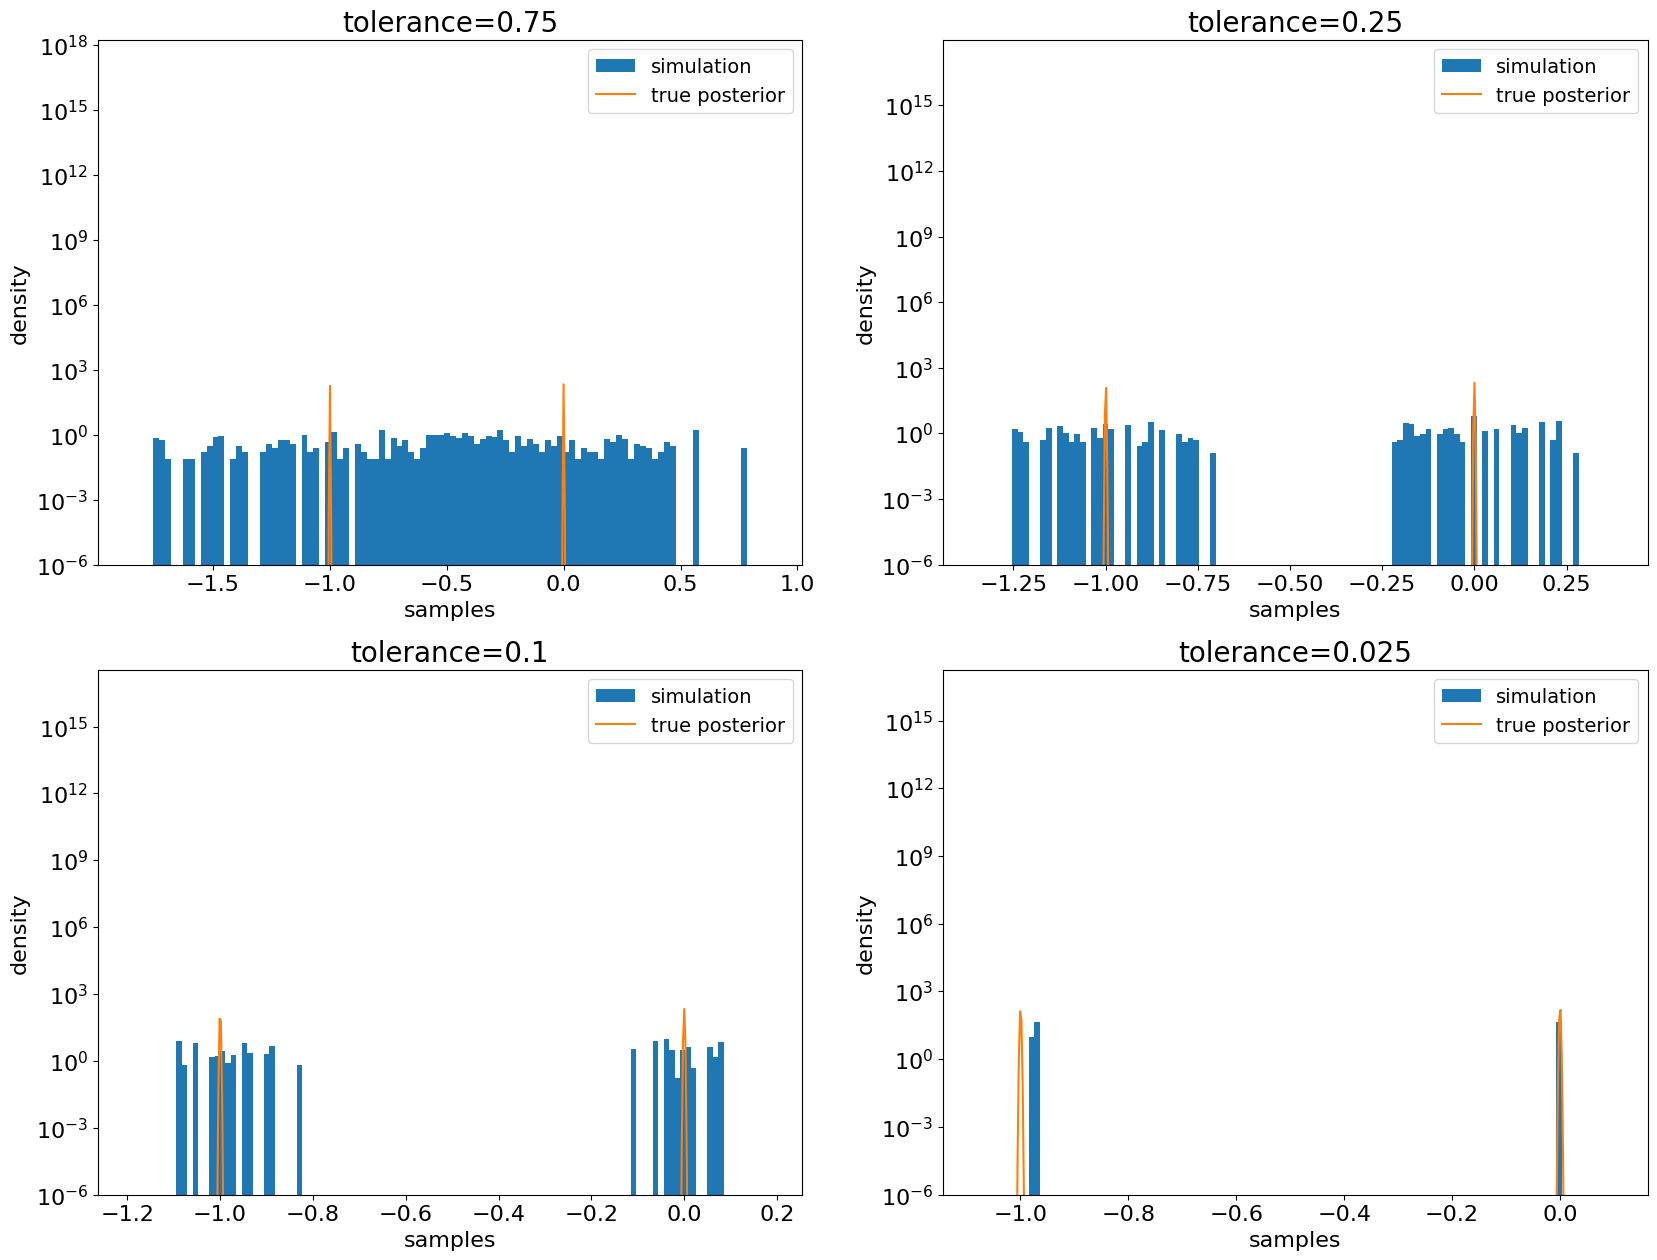

In [4]:
tolerance_samples = []
for tolerance in example_tolerances:
    tolerance_samples.append(np.load(f"data/ex/q3/ex_q3_[pvar={proposal_vars[1]}]_[tol={tolerance}]_[N={example_N}].npy"))

plot_ex_samples(tolerance_samples, posterior_model, example_tolerances, set_log=True, set_ylim=1e-6, save_path=f"data/ex/q3/figures/ex_q3_pvar{proposal_vars[1]}.pdf")

#### Results for var=2

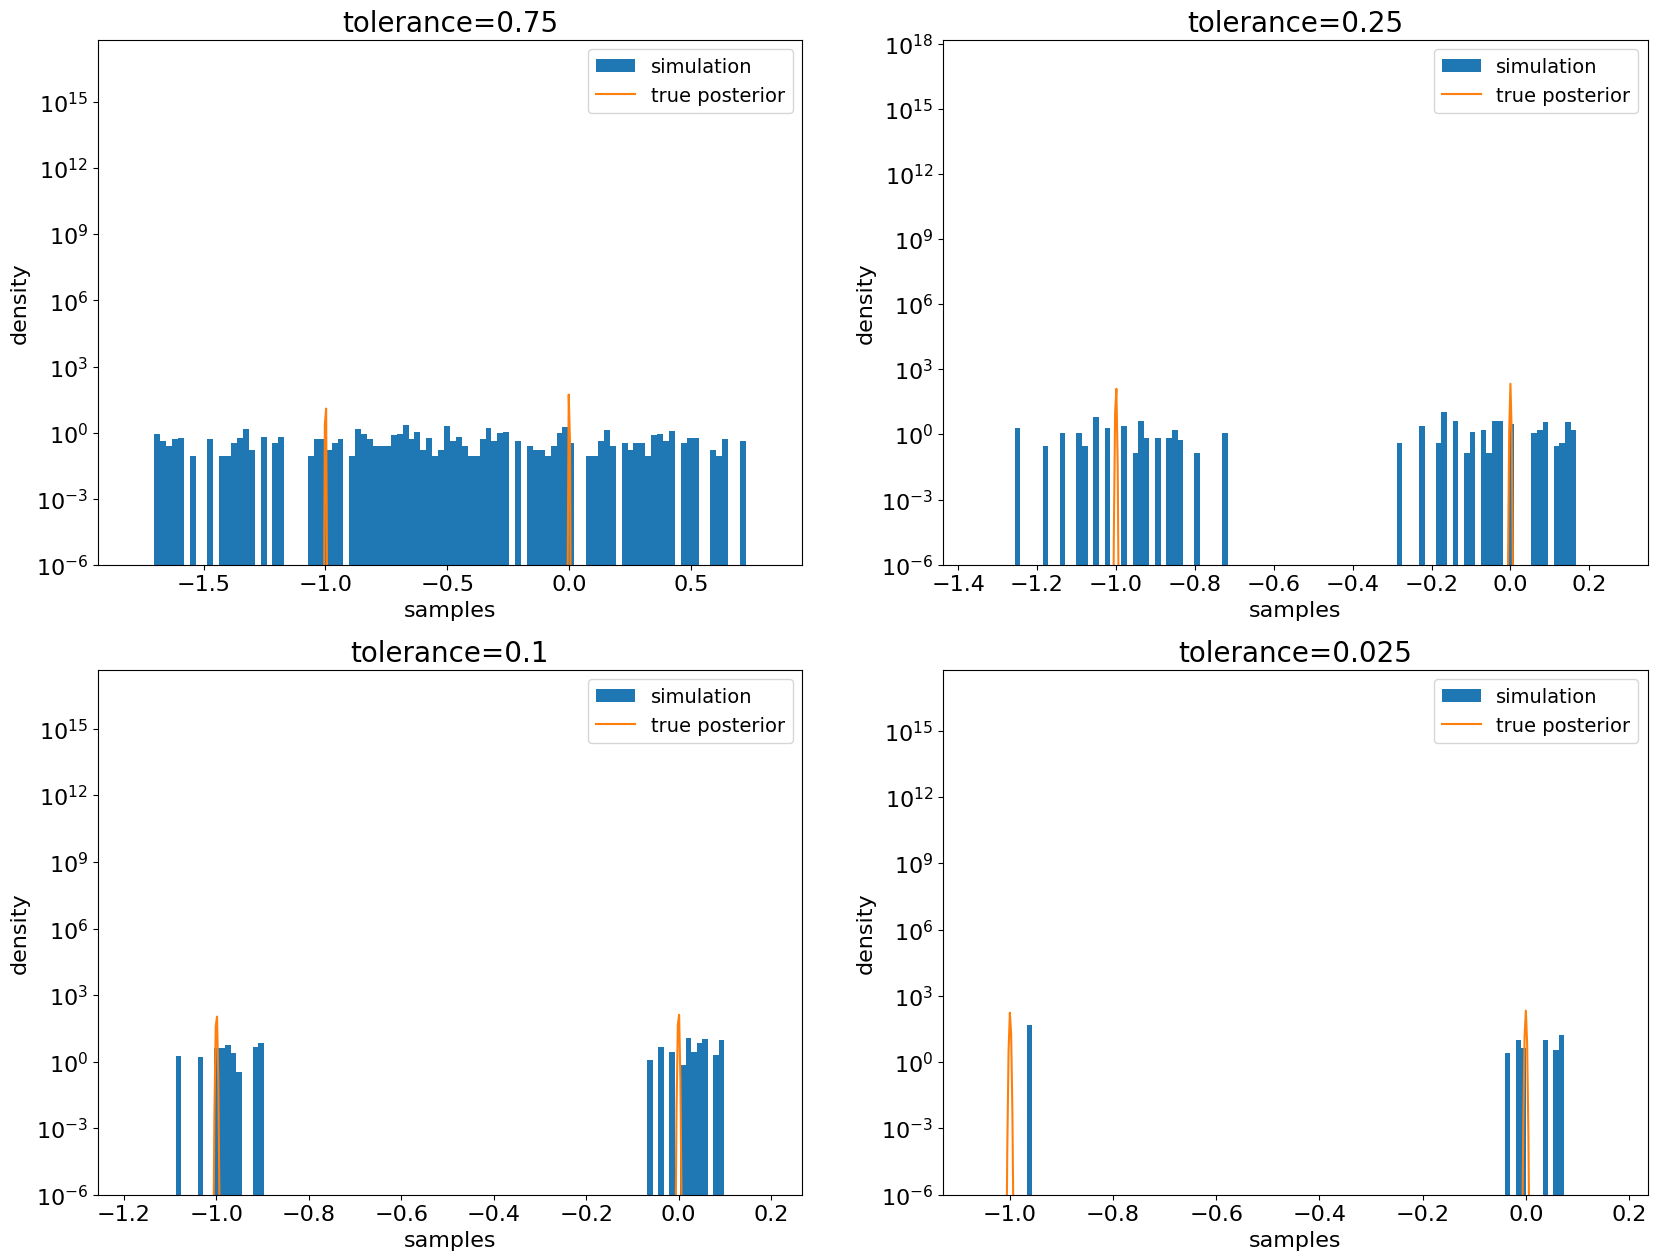

In [5]:
tolerance_samples = []
for tolerance in example_tolerances:
    tolerance_samples.append(np.load(f"data/ex/q3/ex_q3_[pvar={proposal_vars[2]}]_[tol={tolerance}]_[N={example_N}].npy"))

plot_ex_samples(tolerance_samples, posterior_model, example_tolerances, set_log=True, set_ylim=1e-6, save_path=f"data/ex/q3/figures/ex_q3_pvar{proposal_vars[2]}.pdf")

#### Results for var=4

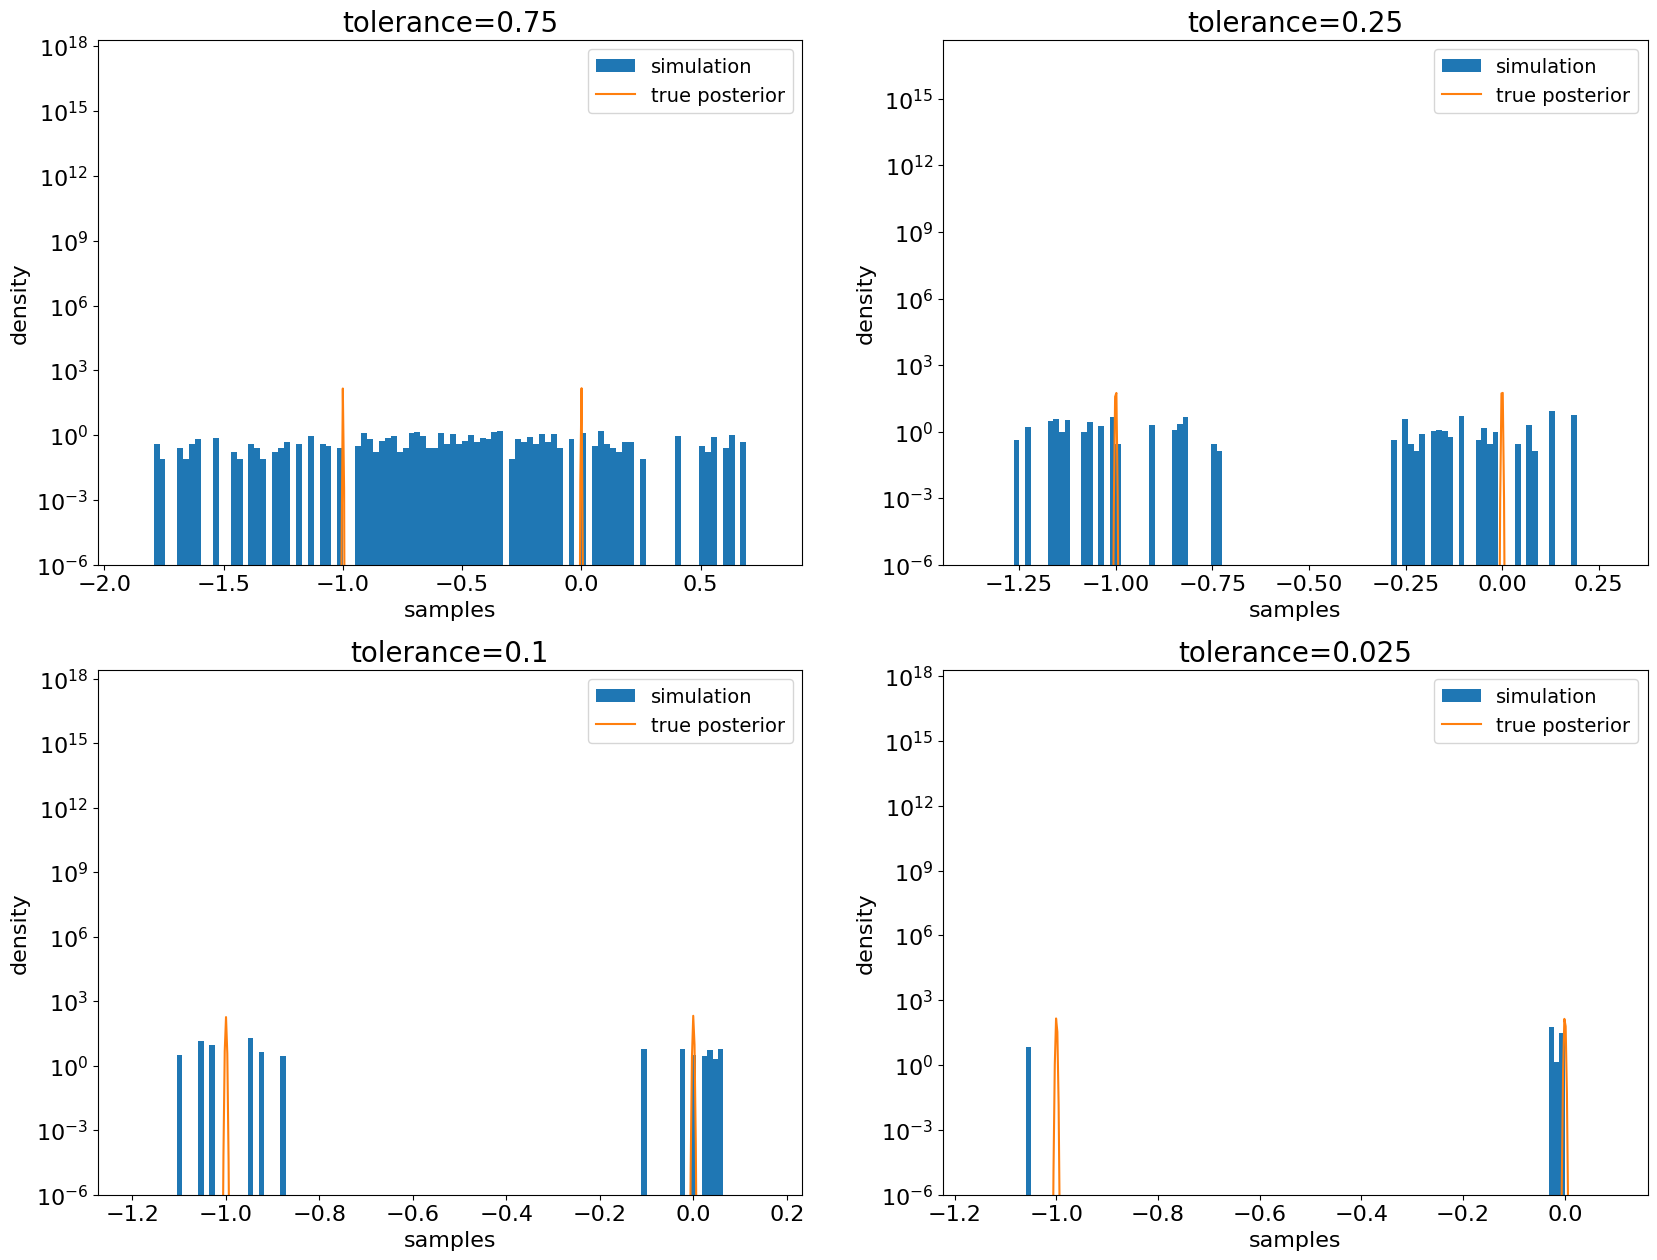

In [7]:
tolerance_samples = []
for tolerance in example_tolerances:
    tolerance_samples.append(np.load(f"data/ex/q3/ex_q3_[pvar={proposal_vars[3]}]_[tol={tolerance}]_[N={example_N}].npy"))

plot_ex_samples(tolerance_samples, posterior_model, example_tolerances, set_log=True, set_ylim=1e-6, save_path=f"data/ex/q3/figures/ex_q3_pvar{proposal_vars[3]}.pdf")

#### Results for var=8

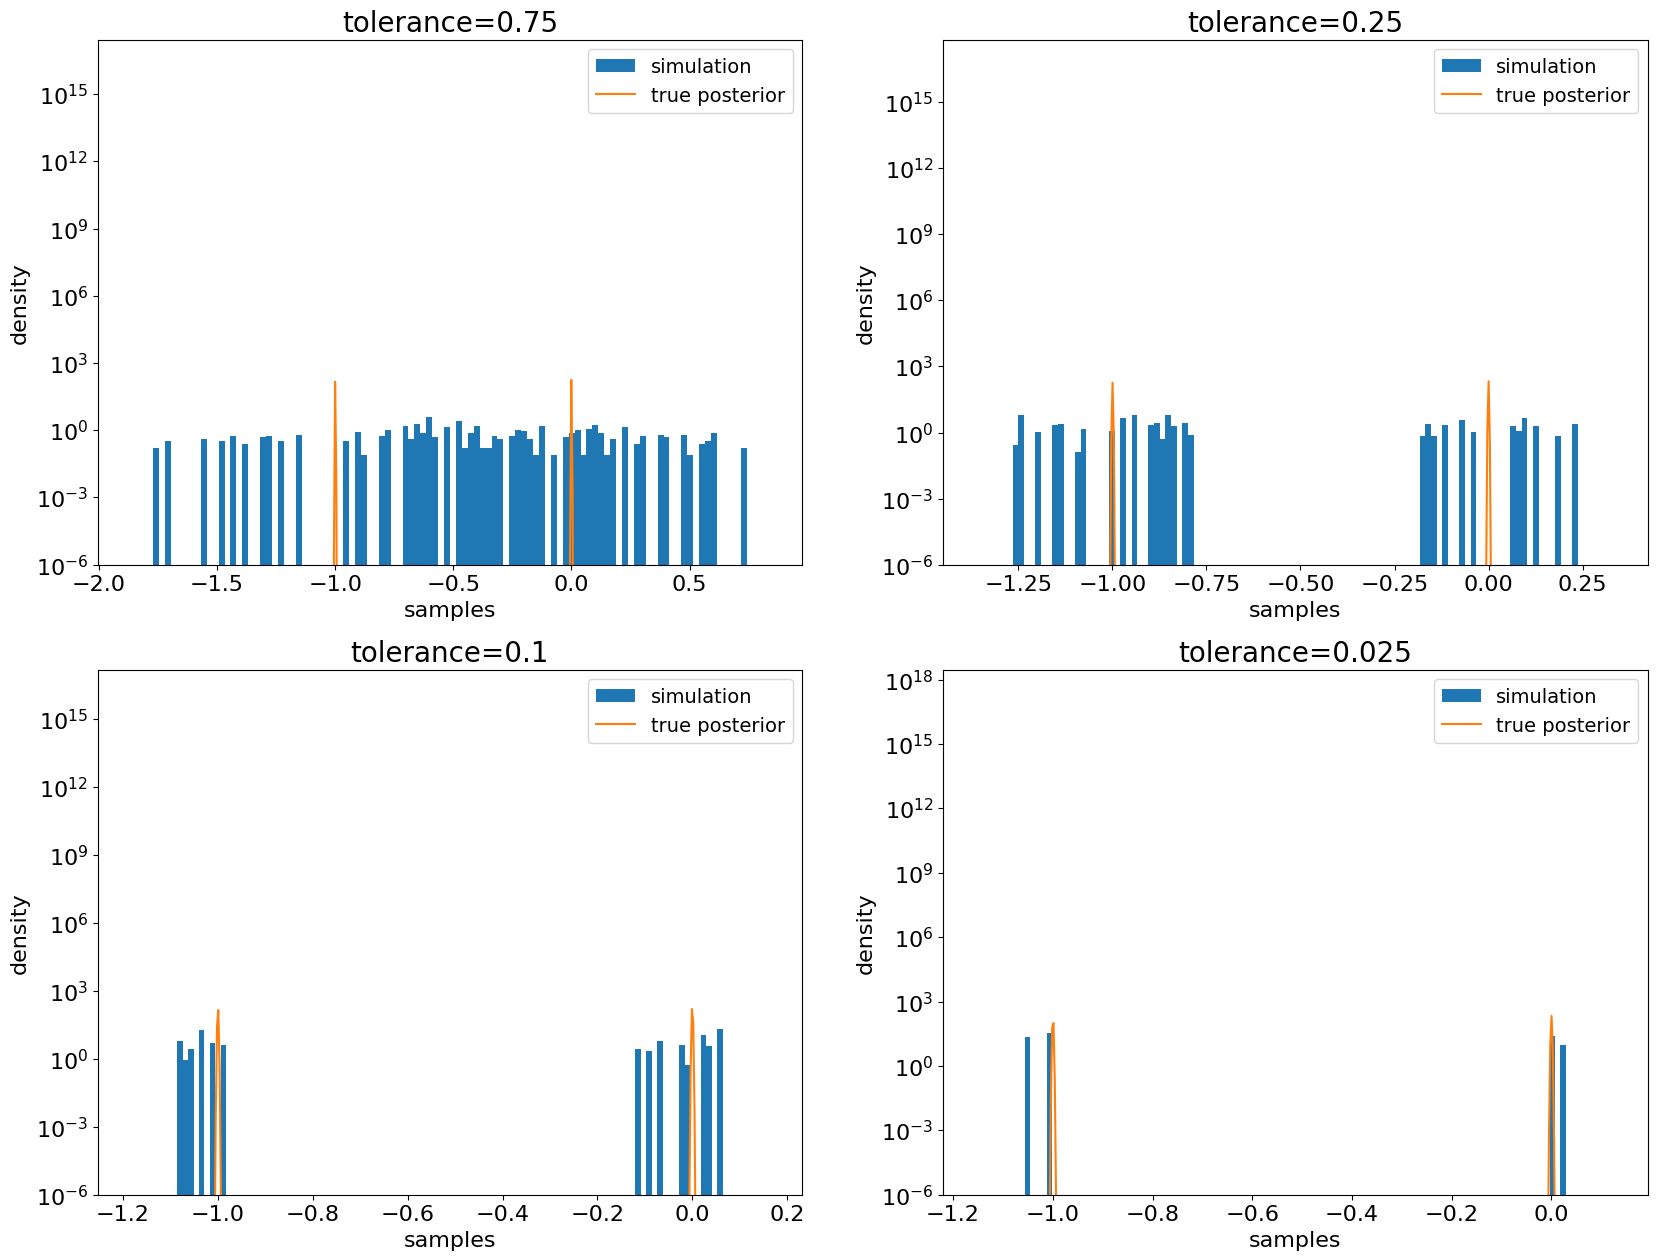

In [8]:
tolerance_samples = []
for tolerance in example_tolerances:
    tolerance_samples.append(np.load(f"data/ex/q3/ex_q3_[pvar={proposal_vars[4]}]_[tol={tolerance}]_[N={example_N}].npy"))

plot_ex_samples(tolerance_samples, posterior_model, example_tolerances, set_log=True, set_ylim=1e-6, save_path=f"data/ex/q3/figures/ex_q3_pvar{proposal_vars[4]}.pdf")

## Pharmacokinetics Problem

### Observed data

In [24]:
import numpy as np

from pharmacokinetics import sampling_times

observed_data = np.load("data/ph/q4/ph_observed_data.npy")

for t, x_t in zip(sampling_times, observed_data):
    print(f"t={t}, x_t={x_t}")

t=0.25, x_t=2.3713967491565398
t=0.5, x_t=4.007209277296181
t=1, x_t=5.848125345897168
t=2, x_t=6.919312396940406
t=3.5, x_t=6.284713647332495
t=5, x_t=5.972213386710638
t=7, x_t=5.404302354208366
t=9, x_t=5.145666857219228
t=12, x_t=3.8791675076922667


### Train data for parameter estimation

In [12]:
import pandas as pd

from pharmacokinetics import train_size

train_df = pd.read_csv(f"data/ph/q4/ph_train_data_[size={train_size}].csv")

train_df.head()

,x_[t=0.25],x_[t=0.5],x_[t=1],x_[t=2],x_[t=3.5],x_[t=5],x_[t=7],x_[t=9],x_[t=12],K_a,K_e,Cl,sigma
0,0.410621,0.896078,1.850801,2.728832,2.091249,3.016270,3.605622,4.372277,3.342689,1.403102,0.061855,0.083589,0.525665
1,0.551929,1.007236,1.269937,1.732547,1.369315,1.402990,1.188815,0.211661,-0.746390,1.966361,0.030815,0.096693,0.424611
2,0.338219,0.460740,0.935708,1.127534,0.784874,0.601704,0.313522,0.042641,-0.311713,1.556742,0.021313,0.084379,0.261536
3,0.420919,0.494644,1.029335,0.762094,0.954759,0.943566,1.177974,1.199776,1.028796,1.441256,0.047130,0.172762,0.238268
4,1.138270,1.730856,2.282672,2.912130,2.750806,2.357045,1.237974,0.973370,0.675392,1.329735,0.049492,0.057598,0.434988


### Trained Model Summaries

In [13]:
import pickle

k_a_model = pickle.load(open(f"data/ph/q4/ph_k_a_model_[size={train_size}].pkl", "rb"))
k_e_model = pickle.load(open(f"data/ph/q4/ph_k_e_model_[size={train_size}].pkl", "rb"))
cl_model = pickle.load(open(f"data/ph/q4/ph_cl_model_[size={train_size}].pkl", "rb"))
sigma_model = pickle.load(open(f"data/ph/q4/ph_sigma_model_[size={train_size}].pkl", "rb"))

print("\nK_a model:")
print(k_a_model.summary())


K_a model:
                            OLS Regression Results                            
Dep. Variable:                    K_a   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     86.74
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          1.38e-118
Time:                        13:48:27   Log-Likelihood:                -408.99
No. Observations:                1000   AIC:                             838.0
Df Residuals:                     990   BIC:                             887.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2447      0.018     70.

In [14]:
print("\nK_e model:")
print(k_e_model.summary())


K_e model:
                            OLS Regression Results                            
Dep. Variable:                    K_e   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     81.98
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          2.29e-113
Time:                        13:48:36   Log-Likelihood:                 1909.3
No. Observations:                1000   AIC:                            -3799.
Df Residuals:                     990   BIC:                            -3750.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0692      0.002     39.

In [15]:
print("\nCl model:")
print(cl_model.summary())


Cl model:
                            OLS Regression Results                            
Dep. Variable:                     Cl   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     48.58
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           8.88e-73
Time:                        13:48:39   Log-Likelihood:                 1513.1
No. Observations:                1000   AIC:                            -3006.
Df Residuals:                     990   BIC:                            -2957.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1113      0.003     42.8

In [16]:
print("\nsigma model:")
print(sigma_model.summary())


sigma model:
                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.644
Date:                Thu, 11 Jan 2024   Prob (F-statistic):            0.00498
Time:                        13:48:42   Log-Likelihood:                 812.40
No. Observations:                1000   AIC:                            -1605.
Df Residuals:                     990   BIC:                            -1556.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3546      0.005     6

In [30]:
coefficients = np.vstack([k_a_model.params, k_e_model.params, cl_model.params, sigma_model.params])
print("\nCoefficients:")
print(coefficients)


Coefficients:
[[ 1.24473971e+00  2.11121711e-01  1.32125142e-01  2.98293676e-02
  -1.42853830e-01 -1.20440869e-01  5.76011342e-02  7.22371554e-02
  -3.47865932e-02  1.29367189e-02]
 [ 6.92204674e-02  4.85107340e-03 -2.20043896e-03 -2.57172532e-03
   4.84081639e-03  3.69951581e-03  5.02673776e-03 -3.23633897e-03
  -4.42039677e-03 -9.81421015e-03]
 [ 1.11308453e-01 -9.57000574e-03  1.22907927e-03  6.17756286e-03
  -9.08672836e-04 -3.77665020e-03 -5.38961152e-05 -1.15662668e-03
   1.90929249e-03 -1.07225431e-02]
 [ 3.54565465e-01  5.84360163e-02 -4.24135857e-02 -6.49541011e-03
   1.52755716e-02 -1.95274827e-02  1.24946084e-02  1.19821132e-02
  -2.62841109e-03 -1.17030278e-02]]


### Marginal distributions of parameters

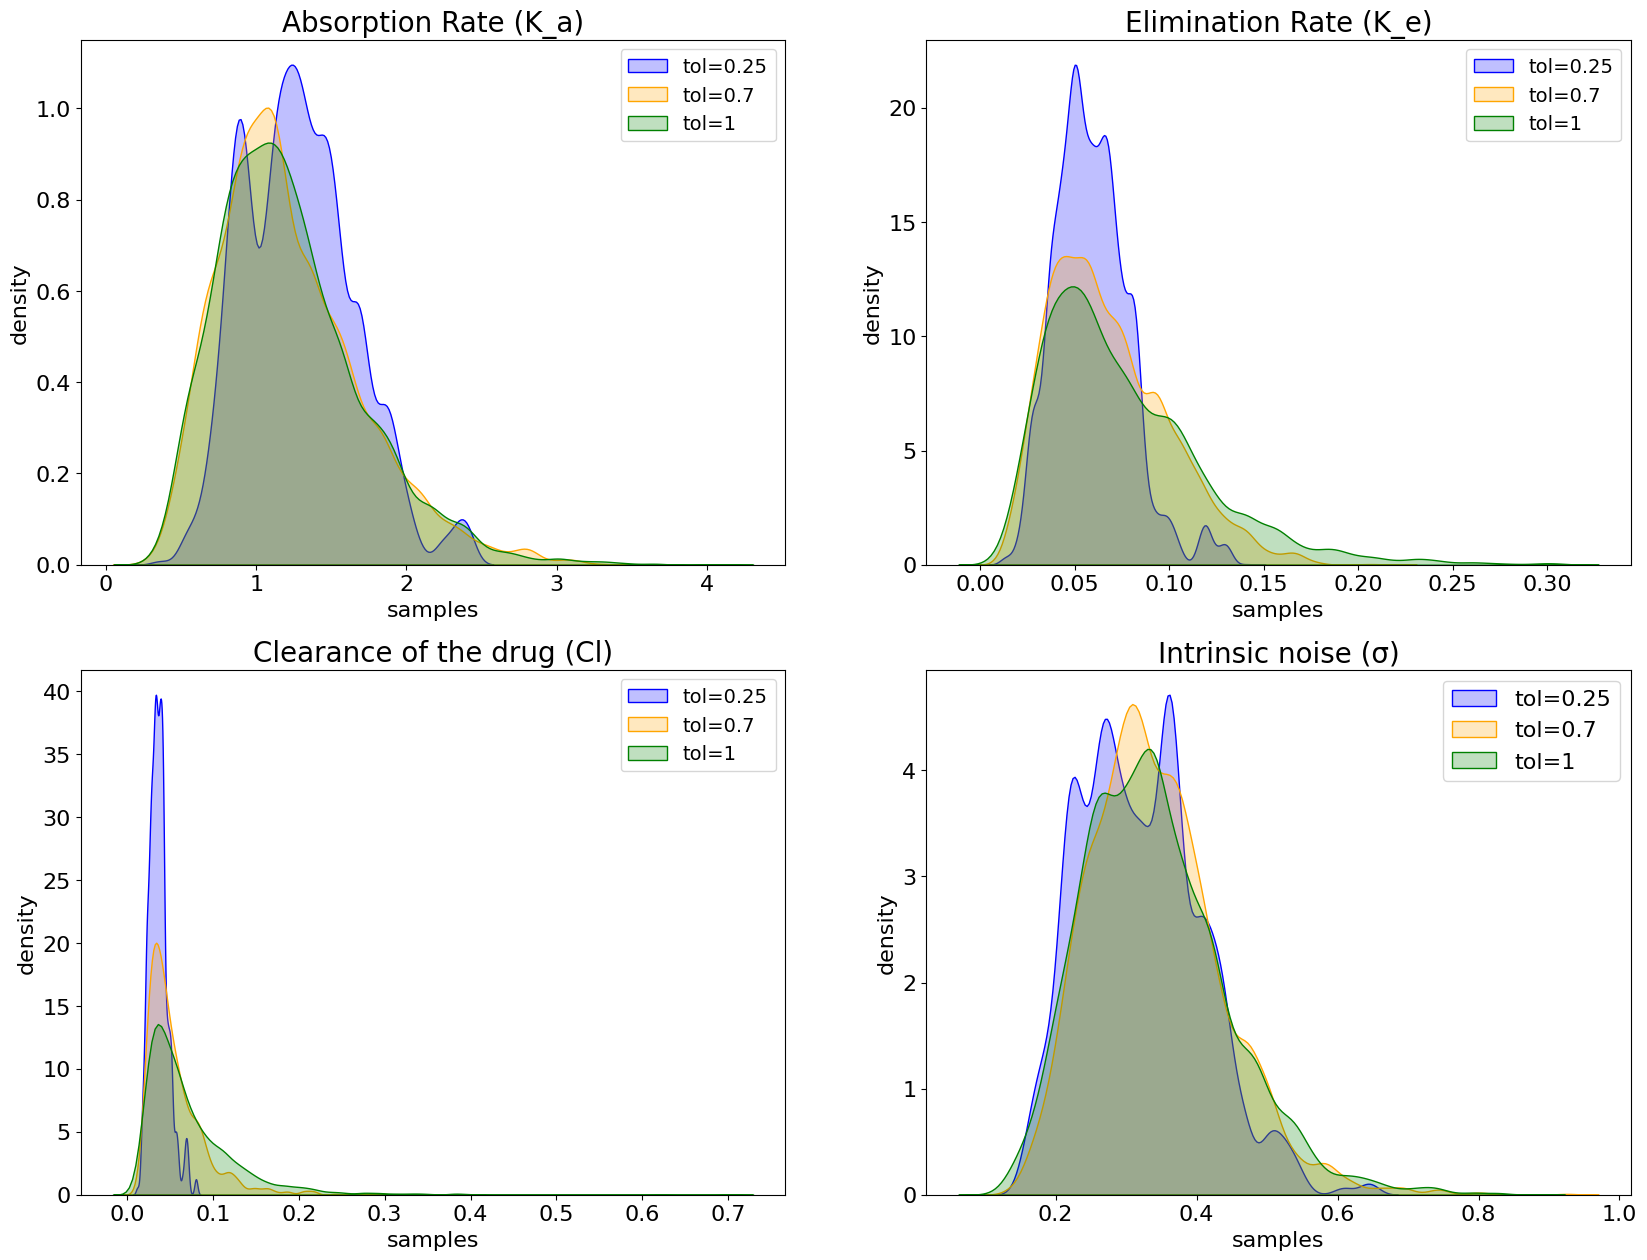

In [3]:
# For Random Walk LogNormal Proposal
import numpy as np
from pharmacokinetics import plot_phk_samples

lognorm_sample_0_25 = np.load("data/ph/q5/rw_lognorm/ph_rw_lognorm_[tol=0.25]_[N=10000].npy")
lognorm_sample_0_7 = np.load("data/ph/q5/rw_lognorm/ph_rw_lognorm_[tol=0.7]_[N=10000].npy")
lognorm_sample_1 = np.load("data/ph/q5/rw_lognorm/ph_rw_lognorm_[tol=1]_[N=10000].npy")

plot_phk_samples([lognorm_sample_0_25, lognorm_sample_0_7, lognorm_sample_1], save_path="data/ph/q5/figures/ph_rw_lognorm.pdf")


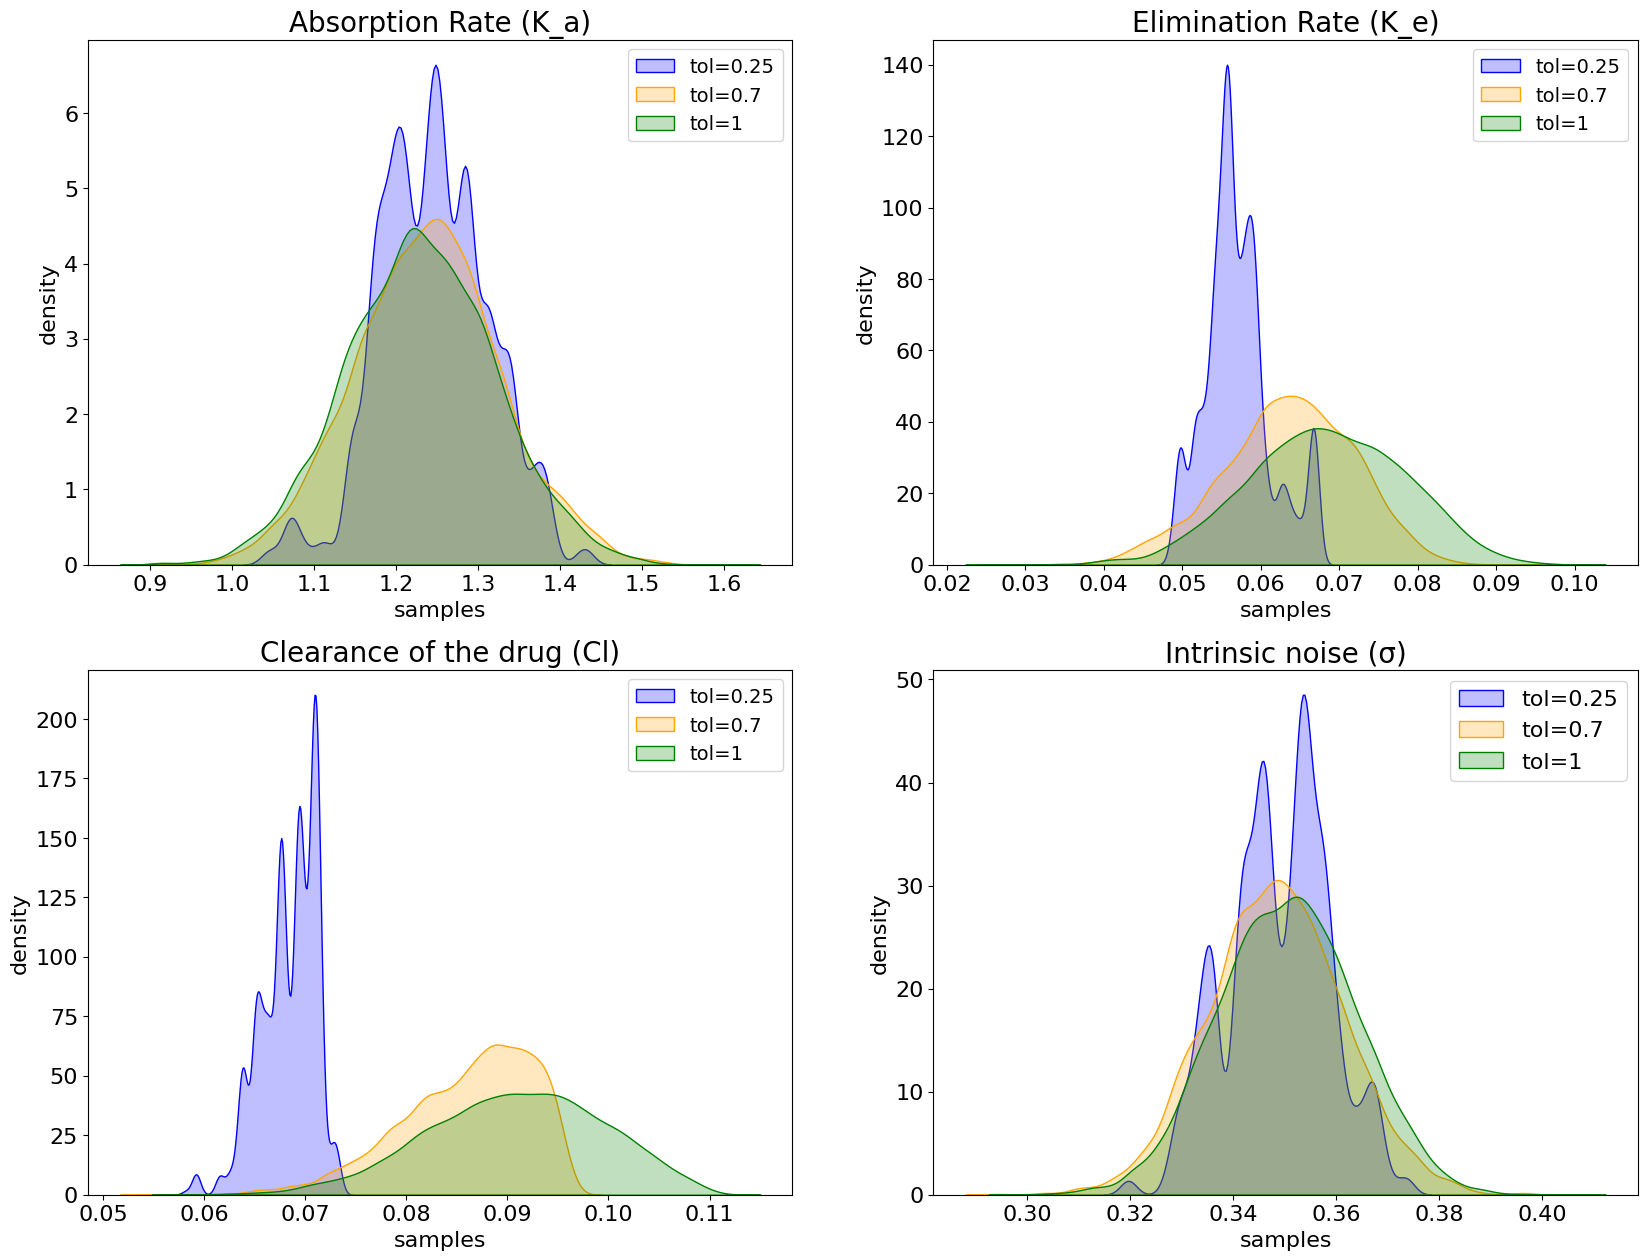

In [4]:
# For Random Walk Data-driven Proposal
dd_sample_0_25 = np.load("data/ph/q5/rw_dd/ph_rw_dd_[tol=0.25]_[N=10000].npy")
dd_sample_0_7 = np.load("data/ph/q5/rw_dd/ph_rw_dd_[tol=0.7]_[N=10000].npy")
dd_sample_1 = np.load("data/ph/q5/rw_dd/ph_rw_dd_[tol=1]_[N=10000].npy")

plot_phk_samples([dd_sample_0_25, dd_sample_0_7, dd_sample_1], save_path="data/ph/q5/figures/ph_rw_dd.pdf")

### Posterior mean of parameters

In [5]:
# For Random Walk LogNormal Proposal
posterior_mean_0_25 = np.mean(lognorm_sample_0_25, axis=0)
posterior_mean_0_7 = np.mean(lognorm_sample_0_7, axis=0)
posterior_mean_1 = np.mean(lognorm_sample_1, axis=0)

print(f"Posterior mean for tolerance 0.25: {posterior_mean_0_25}")
print(f"Posterior mean for tolerance 0.7: {posterior_mean_0_7}")
print(f"Posterior mean for tolerance 1: {posterior_mean_1}")

Posterior mean for tolerance 0.25: [1.28761573 0.0591878  0.03661851 0.32075635]
Posterior mean for tolerance 0.7: [1.21906687 0.06784657 0.05567961 0.34224613]
Posterior mean for tolerance 1: [1.22205014 0.07587596 0.07197022 0.34078037]


In [6]:
# For Random Walk Data-driven Proposal
posterior_mean_0_25 = np.mean(dd_sample_0_25, axis=0)
posterior_mean_0_7 = np.mean(dd_sample_0_7, axis=0)
posterior_mean_1 = np.mean(dd_sample_1, axis=0)

print(f"Posterior mean for tolerance 0.25: {posterior_mean_0_25}")
print(f"Posterior mean for tolerance 0.7: {posterior_mean_0_7}")
print(f"Posterior mean for tolerance 1: {posterior_mean_1}")

Posterior mean for tolerance 0.25: [1.24544762 0.0570305  0.06836462 0.34870453]
Posterior mean for tolerance 0.7: [1.23760155 0.06348224 0.08604246 0.34825339]
Posterior mean for tolerance 1: [1.22969392 0.06835212 0.09079057 0.35050357]


### Variance Reduction Results

In [8]:
cmc_sample_x_9 = np.load("data/ph/q6/ph_x9_raw_data_[size=1000].npy")
print("Crude Monte Carlo Estimation of E[X_9]:")
print(f"mean: {np.mean(cmc_sample_x_9)}, variance: {np.var(cmc_sample_x_9)}")

Crude Monte Carlo Estimation of E[X_9]:
mean: 3.3314200587495932, variance: 0.6220755898550367


In [9]:
av_sample_x_9 = np.load("data/ph/q6/ph_x9_av_data_[size=500].npy")
print("AV Monte Carlo Estimation of E[X_9]:")
print(f"mean: {np.mean(av_sample_x_9)}, variance: {np.var(av_sample_x_9)}")

AV Monte Carlo Estimation of E[X_9]:
mean: 3.3600806200025874, variance: 0.3493538209883753
